## Importing the relevant libraries 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
import os

In [3]:
file_name = "car sales data.csv"

# Search for the file in the current directory and subdirectories
for root, dirs, files in os.walk("."):
    if file_name in files:
        file_path = os.path.join(root, file_name)
        break
else:
    file_path = None

# Load the file if found
if file_path:
    raw_data = pd.read_csv(file_path)
else:
    print(f"File '{file_name}' not found.")

raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing (data cleaning) 

### 1- Exploring the descriptive statistics of the variables

In [4]:
raw_data.describe(include='all') #include='all' is used here to get descriptives for the categorical variables too

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


##### Observations:
- We noticed that there is different number of observations 'count' implying we have missing values
- we have unique entries for categorical variables
- for the model variable there is 312 unique modesl! which is going to be hard to implement (312 dummies will be created)
- the 'top' observation indicates the most common category and 'freq' observation is it's frequency
- almost all entries are 'yes' in the Registration variable, so it looks like it wouldn't be useful
- Model' doesn't seem to be much useful, as Model can be engineered from 'Brand', 'Year', and 'EngineV'. We will not be losing too much variability

### 2- Determining the variables of interest

In [5]:
data = raw_data.drop(['Model'],axis=1) #axis=0 is rows and axis=1 is columns. 'Model' is in the column so axis=1
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### 3- Dealing with missing values

In [6]:
#by looking at the table above and the count row, we can tell that 'Price' and 'EngineV' have missing values
data.isnull().sum() #getting the number of missing values in each column

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

##### Rule of thumb:
if you are removing <5% of the observations, you are free to just remove all the missing values

In [7]:
#it is abvious that the missing values are <5%, so we are safe to remove them
data_no_mv = data.dropna(axis=0) #axis=0 since we are droping observations (rows) not columns

In [8]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### 4- Exploring the PDFs (Probablity Distribution Functions)
For optimal results we would be looking for normal distributions

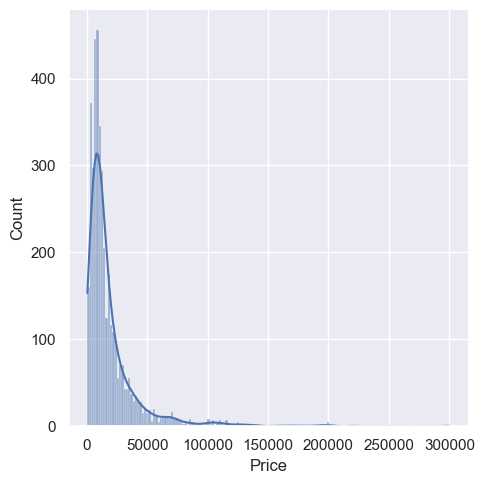

In [9]:
sns.displot(data_no_mv['Price'], kde=True) # `kde=True` adds a Kernel Density Estimate

- It looks like 'Price' have an exponential distribution
- From it's discriptives above: mean= $19000, min= $600, 25% of prices are below $7000, 50% below $11500, 75% below $21900, but max is $300000
- Obviously we have outliers to the right of the mean (def: outliers are observations that lie on abnormal distance from the other observations in the data)

##### Dealing with outliers
one way to deal with outliers seemlessly is to remove top 1% of observations 

In [10]:
q = data_no_mv['Price'].quantile(0.99) #quantile method returns the value at the given quantile (.quantile(=np.percentile) )
data_1 = data_no_mv[data_no_mv['Price']<q] #we got the 99th percentile and kept the data below it

data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


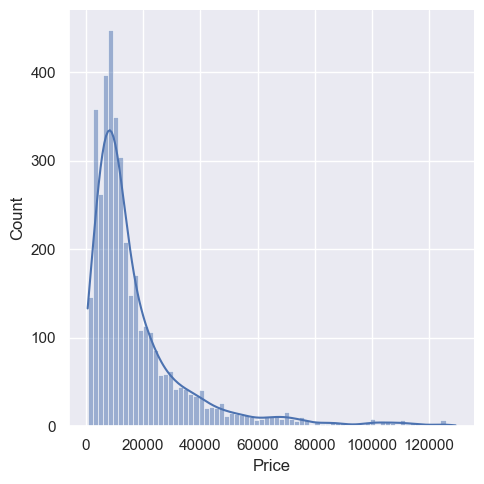

In [11]:
sns.displot(data_1['Price'], kde=True)

##### Now doig the same for the other numaric variables 

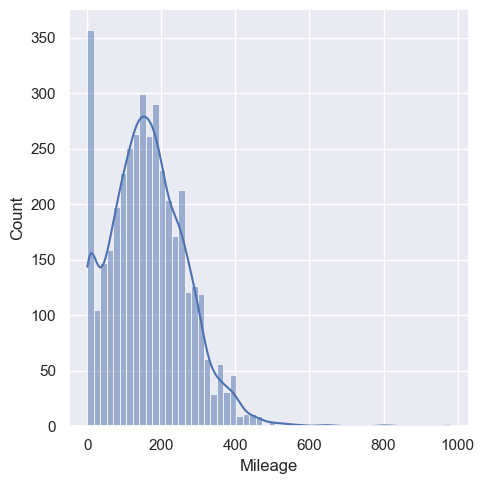

In [12]:
sns.displot(data_no_mv['Mileage'], kde=True)

In [13]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

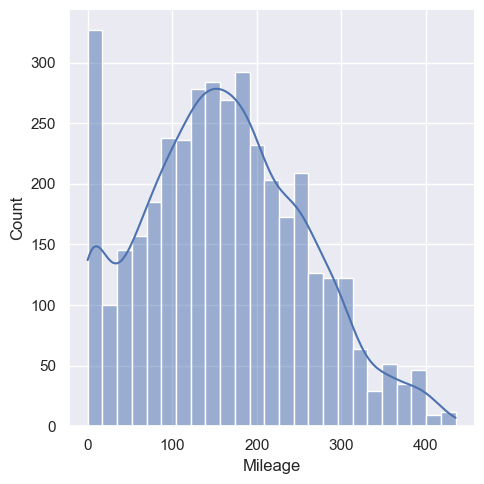

In [14]:
sns.displot(data_2['Mileage'], kde=True)

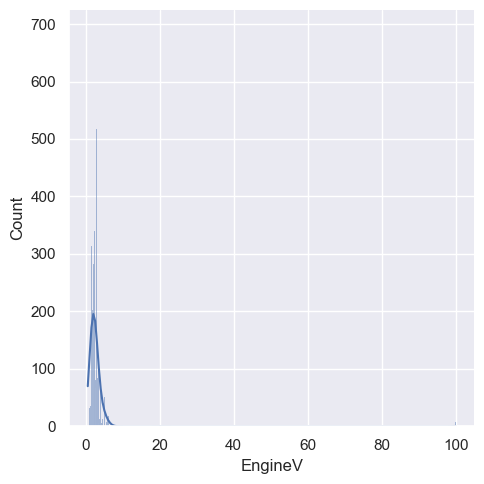

In [15]:
sns.displot(data_no_mv['EngineV'], kde=True)

In [16]:
EngV = pd.DataFrame(raw_data['EngineV']).dropna(axis=0)
EngV.sort_values(by='EngineV')

,EngineV
2512,0.60
188,0.65
3295,1.00
2725,1.00
1923,1.00
...,...
1311,99.99
3114,99.99
1264,99.99
3641,99.99


Googling engine volume shows that the interval of it, it is between 0.6 and 6.5. so 99.99 is acually a missing value. it is a common way to assign 99.99 number when we have a missing value in some places. 

In [17]:
data_3 = data_2[data_2['EngineV']<6.5] # we have a benhmark (6.5) that engines' volume can't exceed

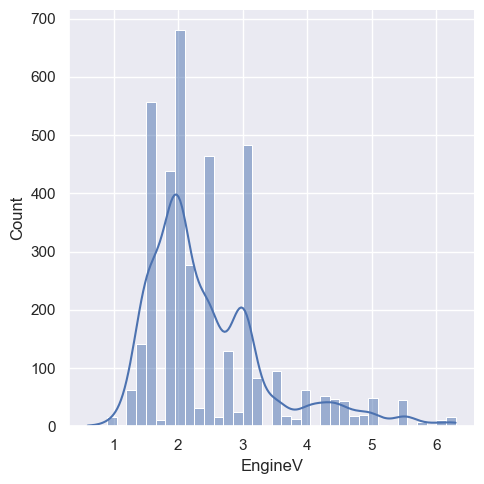

In [18]:
sns.displot(data_3['EngineV'], kde=True)

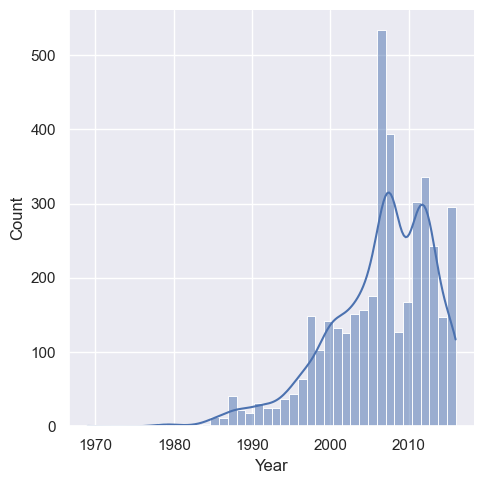

In [19]:
sns.displot(data_no_mv['Year'],kde= True)

In [20]:
q = data_3['Year'].quantile(0.01) #this time the outliers are on the left side of the mean, so we will remove the first percentile, keeping all obeservations that are higher
data_4 = data_3[data_3['Year']>q]

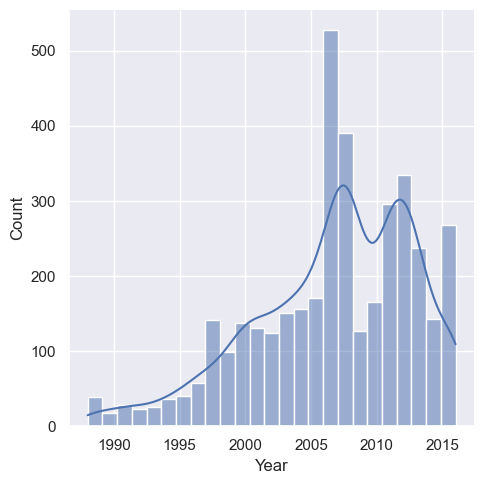

In [21]:
sns.displot(data_4['Year'],kde=True)

##### we will just reset the index of the cleaned data
Currently the indices refer to all the data including the observations we removed 

In [22]:
data_cleaned = data_4.reset_index(drop=True) #drop=True to completely forget the old index

In [23]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


Overall we've deleted about 250 observations

## Checking OLS (Ordinary Least Squares) assumptions

##### There is five OLS assumptions we need to check before doing the regression:
- Linearity: variables have linear relation with the target
- Non-endogenerity: variables must be uncorrelated with the error term
- Normality and homoscendosticity: the error term has a constant variance across all values of the variables
- No autocorrelation: the error terms are not correlated with each other
- No multicolinearity: there should not be a perfect (or very high) correlation among the variables 

##### 1- Linearity:

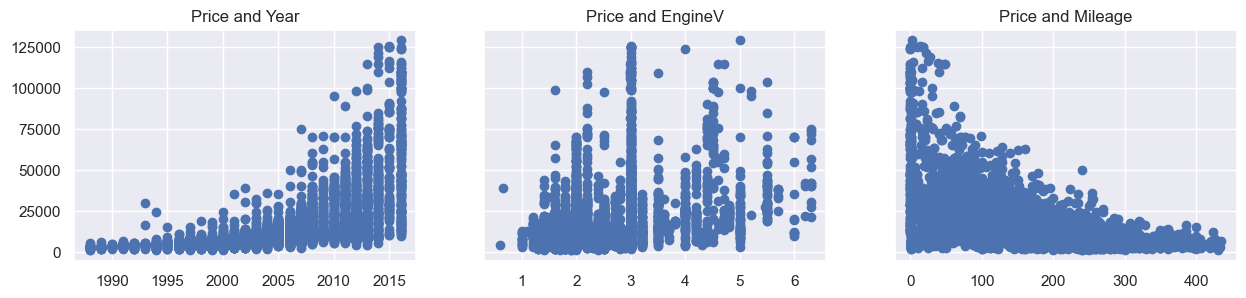

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

- We can spot pattrens but not linear ones
- The plots all indicate that prices is not normally distibuted,line thats why there is no linear realtionship with the variables
##### Solution: transform one or more variables 

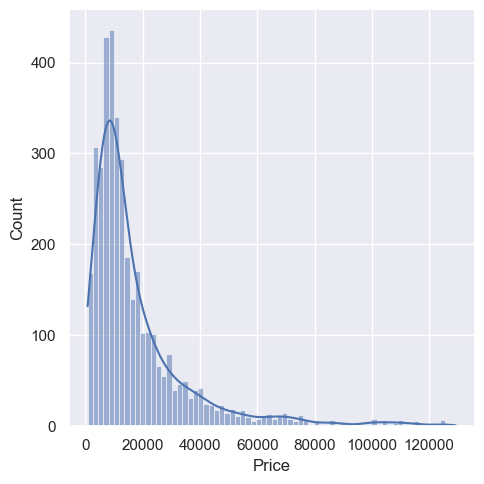

In [25]:
sns.displot(data_cleaned['Price'],kde=True)

Log transforations are especially useful when facing exposnential relationships

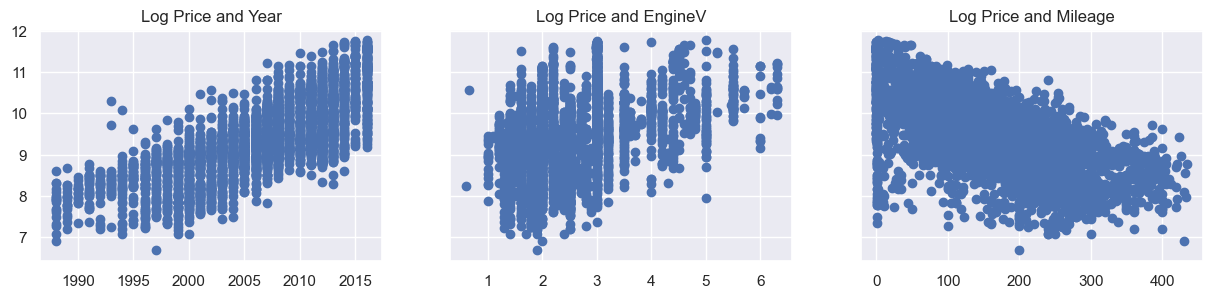

In [26]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [27]:
data_cleaned = data_cleaned.drop(['Price'],axis=1) #we now can see a linear relationship so we can drop the original price form the df 

##### 2- No endogeneity:
No endogeneity often due to omitted variables, measurement error, or simultaneity, and it can be addressed by using instrumental variables (IV), adding relevant variables, or applying Two-Stage Least Squares (2SLS) regression.
##### We will discuss the residuals after the regression is created.

##### 3- Normality and homoscendosticity:
- normality: assumed for big sample following the CLT
- zero mean: accomplished through the inclusion of the intercept in the regression 
- homoscedasticity: already shown in the graphs (already implemented log transformation)

##### 4- No autocorrelation:
The observations that we have are not coming from time series data or panel data. There is no reason to be dependent on each other. So no need to worry about that. 

##### 5- No multicollinearity:
Check if two or more variables have high correlation

In [28]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

- Logically 'Year' and 'Mileage' will be correlated
- Sklearn doesn't have a dedicated mothod to check this assumption
- One of the best ways to check for multicollinearity is through VIF (varaince inflation factor)
- VIF produces a measure which estimates how much larger the square root of the standard error of an estimate is, compared to a situation where the variable was completely uncorrelated with other predictors 

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #improt

variables = data_cleaned[['Mileage','Year','EngineV']] #define which variables we want to check for multicollinearity 
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


Year is too correlated with other variables so we will remove it 
##### Rule: 
- VIF = 1 : no multicollinearity (min value of the measure)
- 1<VIF<5 : perfectly okay
- 5<VIF : unacceptable ; some sources says 6 or 10

In [30]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Dealing/preprocessing with categorical variables: Creating dummy variables
pd.get_dummies(df[,drop_first]) spots all categorical variables and creates dummies automatically 

Note: If we have N categories for a feature, we have to create N-1 dummies (it will be the benchmark)
If we include a separate dummy variable for each category, we will introduce mutlicollinearity to the regression 


In [31]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True) #drop_first=True inorder to make sure no dummy is created for the benchmarks

data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [32]:
data_with_dummies.columns.values #get the column names to rearrange the dataframe, so the prices be the first column

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [33]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


### Dummies and Variance Inflation Factor

In [34]:
data_preprocessed_vif = data_preprocessed.astype(int)

variables = data_preprocessed_vif.drop(['log_price'],axis=1) # drop log_price from data_preprocessed
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

vif

,VIF,features
0,4.327132,Mileage
1,5.992149,EngineV
2,2.304235,Brand_BMW
3,2.837933,Brand_Mercedes-Benz
4,1.635908,Brand_Mitsubishi
5,2.085437,Brand_Renault
6,2.120646,Brand_Toyota
7,2.817933,Brand_Volkswagen
8,1.480580,Body_hatch
9,1.540293,Body_other


As you can see, all VIFs are pretty much acceptable. The ones that are particularly high are 'EngineV' and 'Registration_yes'. 

We already discussed 'EngineV' in the lecture.

In the case of registration, the main issue is that **most values are 'yes'** so all types of problems come from there. One way this imbalance manifests is in multicollinearity. Remember that all independent variables are pretty good at determining 'log_price'? Well, if 'registration' is always 'yes', then if we predict 'log_price' we are predicting registration, too (it is going to be 'yes'). That is why, whenever a single category is so predominant, we may just drop the variable. 

Note that it will most probably be insignificant anyways.

## Linear regression model

### 1- Declare the inputs and the targets

In [35]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

### 2- Scale the data
Scaling has no effect on the predictive power of dummies, once scaled, they lose all their dummy meaning 

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [37]:
inputs_scaled = scaler.transform(inputs)

### 3- Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=45)

### 4- Create the regression

In [39]:
reg = LinearRegression()
reg.fit(x_train,y_train) #this is a log-linear regression as the dependent variable is the log of 'Price'

LinearRegression()

A simple way to check the final result is to plot the predicted values against the observed values 

In [40]:
y_hat = reg.predict(x_train)

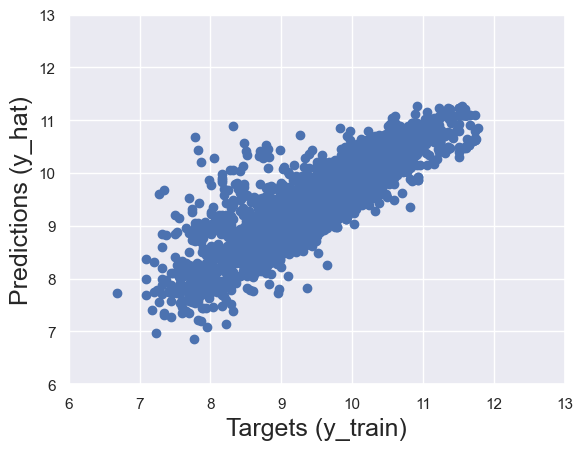

In [41]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

##### Also visualize the Residuals
- Residuals = differences between the targets and the predictions = estimates of errors
###### According to OLS assumptions, they should have: 
- normality
- zero mean
- homoscendasticity

Text(0.5, 1.0, 'Residuals PDF')

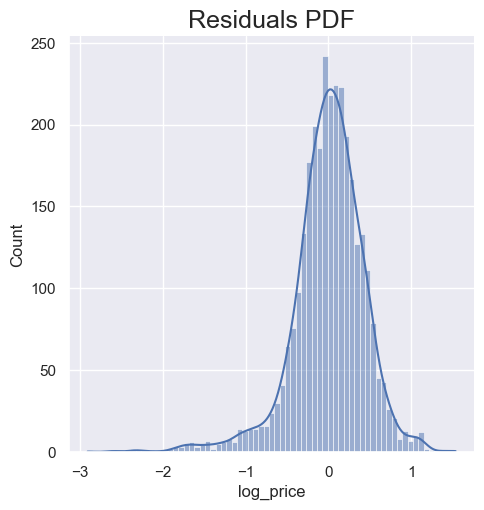

In [42]:
sns.displot(y_train - y_hat,kde=True)
plt.title("Residuals PDF", size=18)

It is normal but, there are certain observations for which ytrain-yhat is much lower than the mean (a much higher price is predicted than the observed one).

In [43]:
reg.score(x_train,y_train) #our model is explaining 75% of the variablity  (r squared)

0.7534647625452227

### Finding the weights and bias

In [44]:
reg.intercept_

9.413930624356142

In [45]:
reg.coef_

array([-0.45877002,  0.21142619,  0.01446319,  0.00686897, -0.14354616,
       -0.18592516, -0.06165806, -0.09631008, -0.14811302, -0.09380062,
       -0.19099589, -0.12311884, -0.16445067, -0.12501996, -0.0282085 ,
       -0.14821545,  0.32383601])

In [46]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.458770
1,EngineV,0.211426
2,Brand_BMW,0.014463
3,Brand_Mercedes-Benz,0.006869
4,Brand_Mitsubishi,-0.143546
5,Brand_Renault,-0.185925
6,Brand_Toyota,-0.061658
7,Brand_Volkswagen,-0.096310
8,Body_hatch,-0.148113
9,Body_other,-0.093801


##### Rules:
- a positive weight shows that a feature increases in value so do the log_price respectively 
- a negative weight shows that as a feature increases in value log_price decreases
###### dummy variables: 
- a positive weight shows that the respective category brand more expensive than the benchmark
- a negative weight shows that the respective category brand less expensive than the benchmark
- Use: data_cleaned['name_of_categorical_variable'].unique() and find the missing category of each feature and it will be the benchmark

## Testing

In [47]:
y_hat_test = reg.predict(x_test)

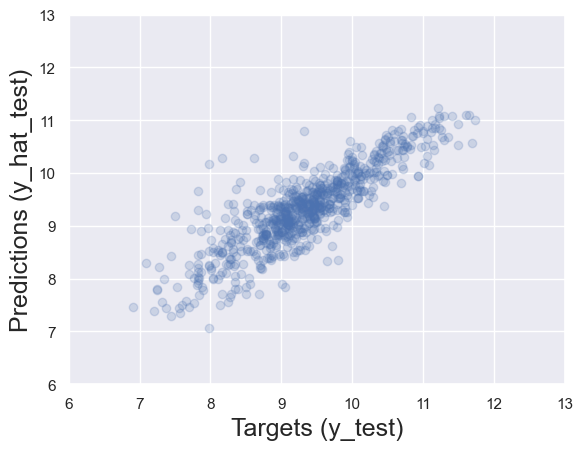

In [48]:
plt.scatter(y_test, y_hat_test, alpha=0.2) #alpha=0.2 specifies the opacity (0<alpha<1 and 1 is defualt)
#the more saturated the color the higher the concentration
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

For higer prices, we have a higher concentration of values around the 45 degree line. Therefore, the model is very good at predicting higher prices. However, for lower ones, they are much more scattered, indicating we are not quite getting the prices right.
##### Checking the predictions performance:

In [49]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction']) #np.exp(y_hat_test) is used here to get the predicitons for prices instead of log_prices
df_pf.head()

,Prediction
0,8458.162620
1,8776.258607
2,7625.973486
3,2429.886535
4,10159.525366


In [50]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,8458.162620,4200.0
1,8776.258607,NaN
2,7625.973486,13300.0
3,2429.886535,23000.0
4,10159.525366,NaN
...,...,...
769,12296.423416,NaN
770,2185.312460,22900.0
771,16482.465660,NaN
772,7736.530900,7500.0


We have alot of missing values and they are randomly spread, because pandas tried to match the y_test indexes with the predictions ones

In [51]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    8.881836
1    9.495519
2    9.230143
3    8.342840
4    9.059517
Name: log_price, dtype: float64

In [52]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,8458.162620,7200.0
1,8776.258607,13300.0
2,7625.973486,10200.0
3,2429.886535,4200.0
4,10159.525366,8600.0
...,...,...
769,12296.423416,8500.0
770,2185.312460,2550.0
771,16482.465660,15500.0
772,7736.530900,13999.0


##### Checking test residuals
lower error -> better explanatory power (OLS -> min SSE)

In [53]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [54]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,8458.162620,7200.0,-1258.162620,17.474481
1,8776.258607,13300.0,4523.741393,34.013093
2,7625.973486,10200.0,2574.026514,25.235554
3,2429.886535,4200.0,1770.113465,42.145559
4,10159.525366,8600.0,-1559.525366,18.134016
...,...,...,...,...
769,12296.423416,8500.0,-3796.423416,44.663805
770,2185.312460,2550.0,364.687540,14.301472
771,16482.465660,15500.0,-982.465660,6.338488
772,7736.530900,13999.0,6262.469100,44.735118


In [55]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,14854.002151,16419.762016,1565.759864,36.199421
std,12097.921823,16931.435748,8738.028833,60.100393
min,1181.653440,999.000000,-37938.395008,0.012094
25%,7216.497428,7000.000000,-1948.718309,10.425379
50%,11271.217375,10900.000000,243.755743,23.253502
75%,17552.982810,18775.000000,3216.802303,41.809907
max,75105.005623,124000.000000,79833.063474,803.811455


- The minimum difference is 0.06&
- the maximum difference is 512% which is off mark
- the percentiles tell us that most our predictions are relatively close

In [57]:
pd.options.display.max_rows = 999 #this line of code is added so that pandas show us all the datapoints without excluding any
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
378,32403.92,32400.00,-3.92,0.01
614,17917.75,17900.00,-17.75,0.10
224,16817.04,16800.00,-17.04,0.10
160,12615.70,12650.00,34.30,0.27
587,8934.21,8900.00,-34.21,0.38
371,40200.72,39999.00,-201.72,0.50
252,11561.11,11500.00,-61.11,0.53
248,11059.81,10999.00,-60.81,0.55
184,8763.51,8700.00,-63.51,0.73
435,3830.91,3800.00,-30.91,0.81


The model we created is not outstanding.
##### How to improve our model:
- use a different set of variables
- remove a bigger part of the outliers
- use different kinds of transformations